# 신용카드 사기 검출 Project
https://www.kaggle.com/kartik2112/fraud-detection

In [1]:
# Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
# 실제 Kaggle상에서 정답을 맞혀볼수는 없어서,Train Set만 활용하여 Split하여 검증을 진행하고자 한다.
df = pd.read_csv('C:/Users/USER/Desktop/Data_projects/CreditCard_Fraud_detection/fraudTrain.csv')

In [3]:
df = df.drop('Unnamed: 0', axis = 1)

In [4]:
# 잘리는 현상을 막고자 max_columns 값 설정
pd.set_option('display.max_columns', 25)
df.head(5)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


## 변수명 정리 
Kaggle 설명을 바탕으로 변수명을 정리하면 다음과 같다.  

- transdatetrans_time : 거래 시간
- cc_num : 카드 번호
- merchant : 거래 발생 가게 이름
- category : 거래 발생 가게 종류
- amt : 거래 금액
- first : 명의자 이름
- last : 명의자 성
- gender : 명의자 성별
- street : 명의자 주소 거리
- city : 명의자 주소 도시
- state : 명의자 주소 주
- zip : 명의자 주소 우편번호
- lat : 명의자 주소 위도
- long : 명의자 주소 경도
- city_pop : 명의자 도시 인구 수
- job : 명의자 직업
- dob : 명의자 생년월일
- trans_num : 거래 번호
- unix_time : 거래 시간(유닉스 시간)
- merch_lat : 거래 상점의 위도
- merch_long : 거래 상점의 경도
- is_fraud  <--- Target Class

## EDA

### 결측치/ 타입 확인

In [5]:
df.isna().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

결측치가 단 하나도 없는 데이터이다.! 와!

In [6]:
df.dtypes

trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

### (1) Target_class EDA

In [7]:
df.is_fraud.value_counts()

0    1289169
1       7506
Name: is_fraud, dtype: int64

Fraud라고 분류된 Target이 극소수로 매우 imbalanced된 데이터임을 알 수 있다.  
따라서 Target들이 가지고 있는 공통점을 찾던가, 유사한 데이터를 만들어주는 SMOTE중 하나를 고민해야 할 것이다.  

### (2) Store EDA

#### Category에 대한 EDA

In [8]:
# category
df.category.value_counts()

gas_transport     131659
grocery_pos       123638
home              123115
shopping_pos      116672
kids_pets         113035
shopping_net       97543
entertainment      94014
food_dining        91461
personal_care      90758
health_fitness     85879
misc_pos           79655
misc_net           63287
grocery_net        45452
travel             40507
Name: category, dtype: int64

업종별로 몇 개의 가게가 해당되는지 시각화하면 다음과 같다.

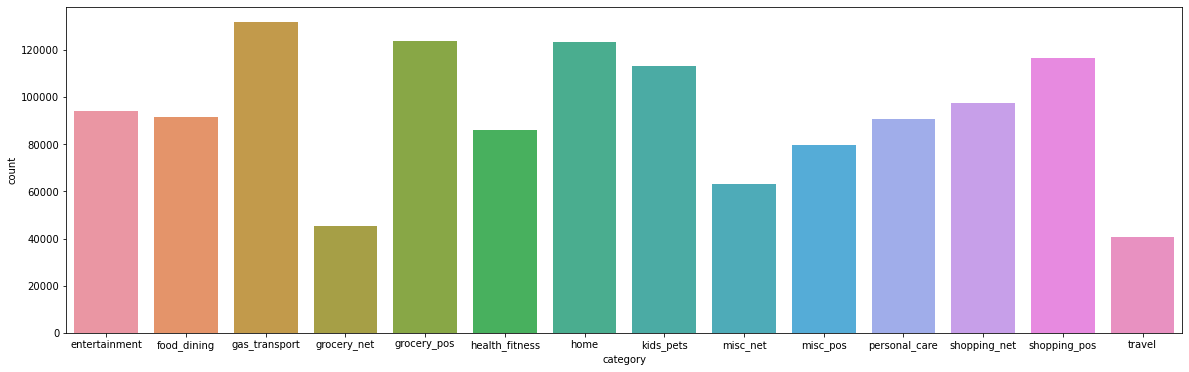

In [9]:
plt.figure(figsize = (20, 6))
sns.countplot(data = df, x = 'category', order = sorted(df.category.unique()))
plt.show()

업종별 fraud 비율을 확인하면 다음과 같다.

In [10]:
fraud_cnt_category = (df.loc[df.is_fraud == 1]).category.value_counts()
total_cnt_category = (df.category.value_counts())

In [47]:
categories = total_cnt_category.index
rate = []
for c in categories:
    fraud_rate = fraud_cnt_category[c] / total_cnt_category[c] * 100
    rate.append(fraud_rate)

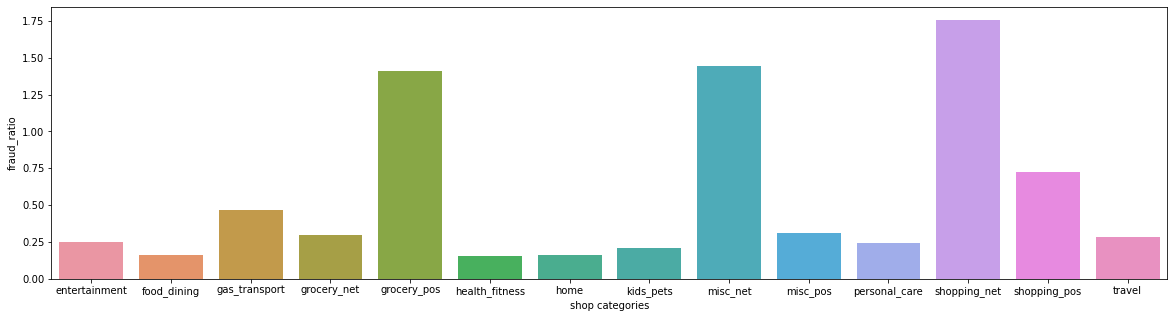

In [48]:
plt.figure(figsize = (20, 5))
sns.barplot(x = categories, y = rate, order = sorted(categories))
plt.xlabel('shop categories')
plt.ylabel('fraud_ratio')
plt.show()

해석 / 업종별로 fraud detection 발생 비율의 차이가 크다. 특히 shopping_net, grocery_pos. misc_net, shopping_pos에서 fraud 발생 비율이상대적으로 더 높음을 알 수 있다. 이들의 구매 금액에 대해서 다시 한번 살펴보는 것이 중요할 것이다.

#### amt

업종별로 결제 금액이 어느 정도인지, fraud/nonfraud별로 어느 정도 차이가 있는지 확인할 수 있다.

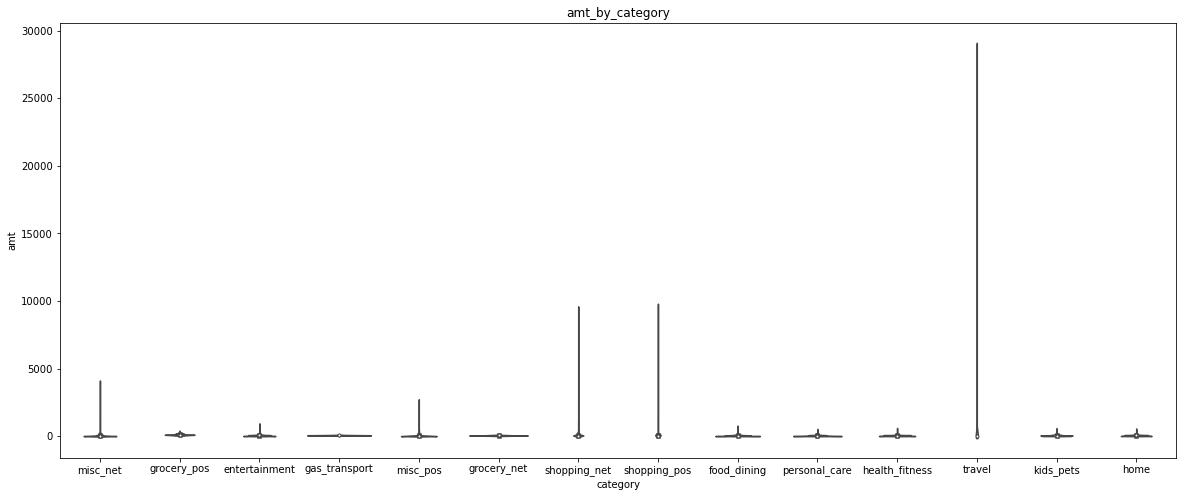

In [13]:
plt.figure(figsize = (20, 8))
sns.violinplot(y = 'amt', x = 'category', data = df)
plt.title('amt_by_category')
plt.show()

특정 일부 종목에서 큰 이상치가 보이고 있음을 확인할 수 있다.
이에 대한 부분을 제외하고 시각화하기 위해 amt 5000 이하, amt1000이하로 범위를 제한하고 다시 분포를 확인하면 다음과 같다.

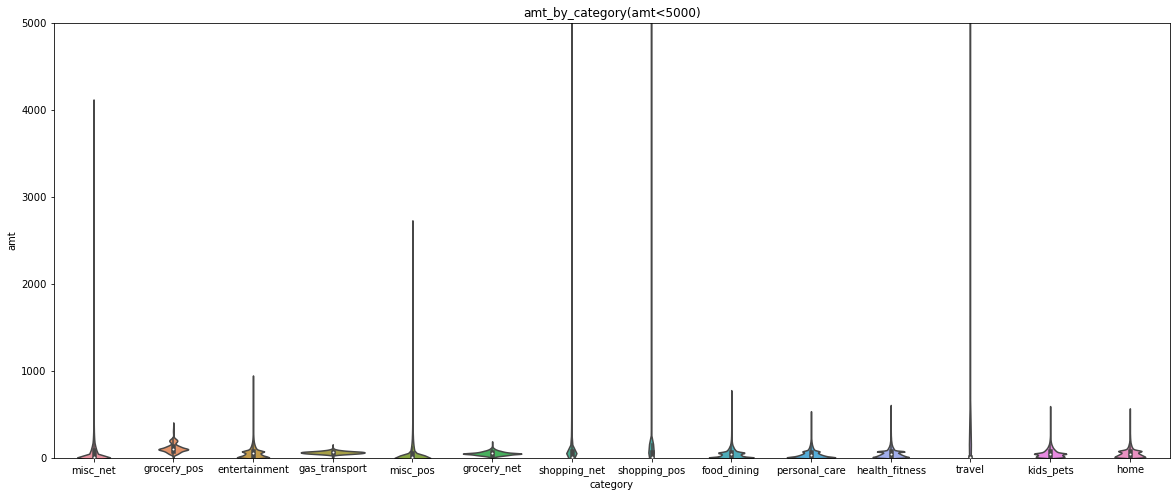

In [14]:
plt.figure(figsize = (20, 8))
sns.violinplot(y = 'amt', x = 'category', data = df)
plt.ylim(0, 5000)
plt.title('amt_by_category(amt<5000)')
plt.show()

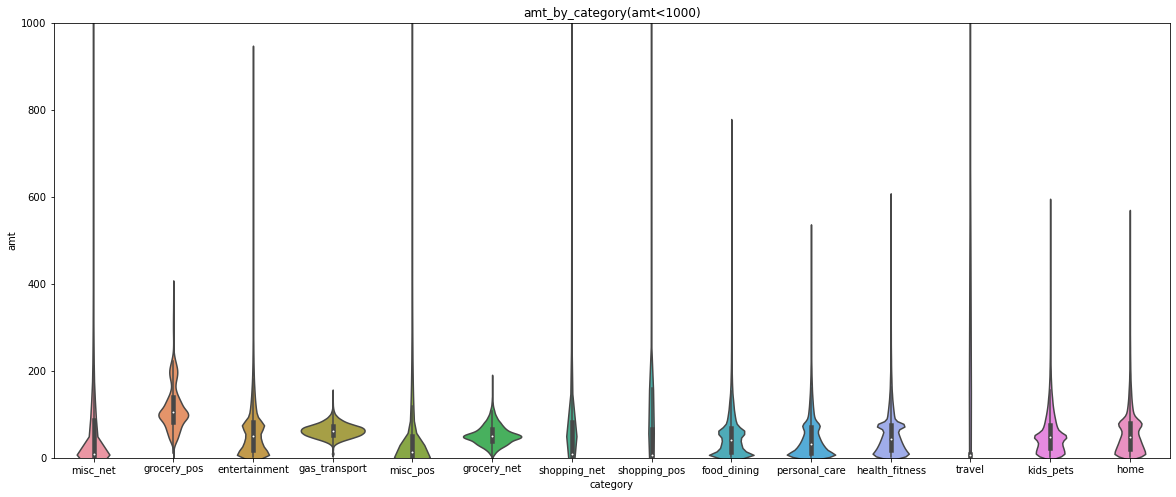

In [15]:
plt.figure(figsize = (20, 8))
sns.violinplot(y = 'amt', x = 'category', data = df)
plt.ylim(0, 1000)
plt.title('amt_by_category(amt<1000)')
plt.show()

해석/ amt by category
1. 대체로 이상치를 제외하고는 값들이 낮은 금액대에 몰려있다는 것을 확인해 볼 수 있다. 
2. 또한 일부 품목은 값들이 낮은 부분에서 한번 몰려 있고, 중간 부분에서 다시 한번 몰려있음을 볼 수 있다.  
  - 이는 해당 품목에는 낮은 가격, 중간 가격으로 분포가 두번 정도 있을 것이라고 추론해 볼 수 있다.
3. 특이한 점은 shopping_net, shopping_pos, travel의 경우는 다른 품목들에 비해 분포가 차지하는 면적이 매우 낮은데, 낮은 가격대를 제외하고 중간/높은 가격 대에서 유의미한 인원이 꽤 있을 것이라고 추측해 볼 수 있다.  
  - 앞에서, 다른 업종에 비해 shopping_net, grocery_pos. misc_net, shopping_pos 에서 유의미하게 fraud 발생 비율이 높았다.  
  - 이는 다른 직종 대비 이상치의 길이가 길고, 정상범주에 들어오는 분포가 다른 업종에 비해 굉장히 얇다는 것에서도 확인 가능하다.

#### amt by Fraud

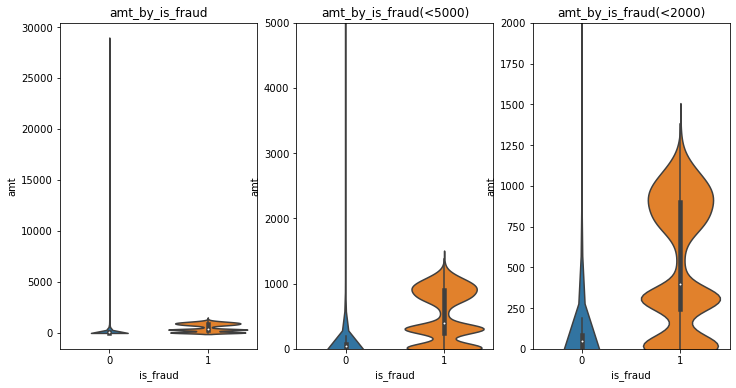

In [16]:
plt.figure(figsize = (12, 6))
plt.subplot(131)
sns.violinplot(y = 'amt', x = 'is_fraud', data = df)
plt.title('amt_by_is_fraud')

plt.subplot(132)
sns.violinplot(y = 'amt', x = 'is_fraud', data = df)
plt.ylim(0, 5000)
plt.title('amt_by_is_fraud(<5000)')

plt.subplot(133)
sns.violinplot(y = 'amt', x = 'is_fraud', data = df)
plt.ylim(0, 2000)
plt.title('amt_by_is_fraud(<2000)')

plt.show()

해석/ 고금액 결제는 fraud가 아니라 non-fraud임을 알 수 있다. 앞에서 본 travel쪽이 저정도로 높은 금액이 갔음을 고려하면
해당 고금액 결제건은 non-fraud이다. 오히려, fraud는 금액이 상대적으로 낮은 부분에서 몰려 발생했음을 알 수 있다.  
다만 이상치의 영향을 제외하면, fraud가 nonfraud에 비해 전체적인 금액대가 높은 데에서 분포해있음을 알 수 있다.  

즉, 확실한 고금액 결제를 제외하면 대부분 fraud는 조금 더 높은 가격에서 발생했음을 알 수 있다. 그러나 분포상에는 저금액대에서도 발생했음을 알 수 있는데, 이를 구체적으로 확인하기 위해 업종별로/fraud여부별로 amt의 분포를 확인하고자 한다.

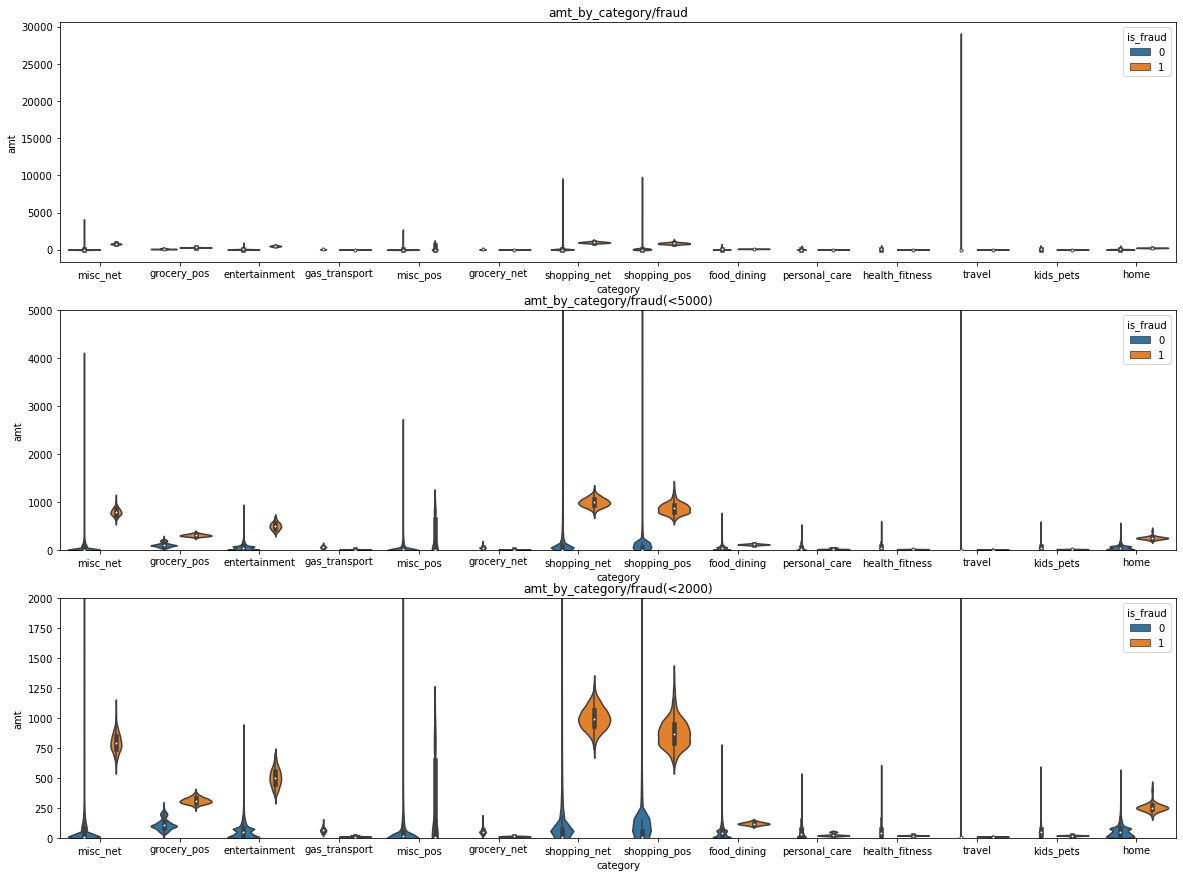

In [17]:
plt.figure(figsize = (20, 15))

plt.subplot(311)
sns.violinplot(y = 'amt', x = 'category', hue = 'is_fraud', data = df)
plt.title('amt_by_category/fraud')

plt.subplot(312)
sns.violinplot(y = 'amt', x = 'category', hue = 'is_fraud', data = df)
plt.ylim(0, 5000)
plt.title('amt_by_category/fraud(<5000)')

plt.subplot(313)
sns.violinplot(y = 'amt', x = 'category', hue = 'is_fraud', data = df)
plt.ylim(0, 2000)
plt.title('amt_by_category/fraud(<2000)')
plt.show()

해석/ 업종별로 다시 나눠서 봤을 때 위의 경향이 더 뚜렷하게 나타났다. 고금액의 경우는 오히려 정상적인 결제인 경우다.
그러나, 해당 일부 고금액을 제외하고는 전체적으로 non-fraud 케이스에 비해 fraud 케이스가 전체적인 결제 금액이 더 높다는 것을 확인했다.

즉, 업종별로 이상치의 케이스에 대해서는 Nonfraud일 가능성이 우선적으로 생김을 확인할 수 있다.  
즉 이상치가 아닌 경우는 우선적으로는 nonfraud로 분류하면 될 것이다.  
허나 특이한 점은 일부 업종에 대해서는 fraud값이 거의 0에 가까운 지점에서 나타났는데, 이에 대해서는 다른 정보와 결합하여 특성을 파악하고자 한다.

### (3) Card-Holder EDA

카드 명의자의 성별이나 직업, 나이대를 바탕으로 그 사람의 프로필을 확인할 수 있을 것이며
어느 연령대나 어느 성별, 나이대 등에서 fraud가 빈번하게 일어나는지 또한 확인하여 사용 가능할 것이다.

In [18]:
df.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

### Gender, Age

가장 기본적인 성연령을 파악하고자 한다. 이 때, age에 대한 정보는 따로 만들어야 한다.

<AxesSubplot:xlabel='gender', ylabel='count'>

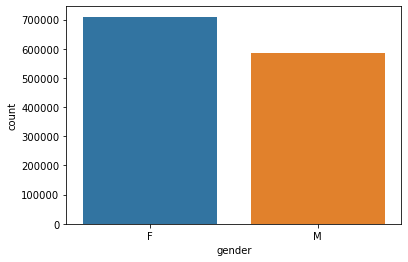

In [19]:
sns.countplot(x = 'gender', data = df)

카드 가입자는 여성보다는 남성이 조금 더 많이 분포했음을 알 수 있다.

In [20]:
# 연령은 간단하게, 2021-year+1형태로 한국식 나이 방식으로 계산하자.
def get_age(day):
    year = int(day[:4])
    return 2022-year

In [21]:
df['age'] = df.dob.apply(lambda s : get_age(s))

In [22]:
df.age.describe()

count    1.296675e+06
mean     4.874255e+01
std      1.737848e+01
min      1.700000e+01
25%      3.500000e+01
50%      4.700000e+01
75%      6.000000e+01
max      9.800000e+01
Name: age, dtype: float64

연령대별 분포를 살펴보고자 한다.

<AxesSubplot:xlabel='age', ylabel='Count'>

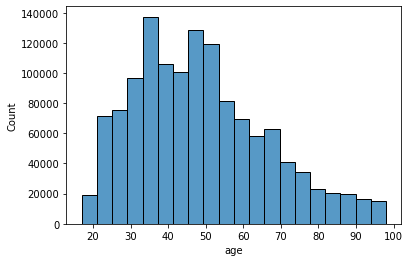

In [23]:
sns.histplot(x = 'age', data = df, bins = 20)

분포가 뒤로 가도 특이점보다는 어느정도 균일하게 이뤄지고 있기에 10대~90대까지 모두 분류해줘야 함을 알 수 있다.

In [24]:
def get_gen(age):
    gen_code = str(age//10*10)
    return gen_code + 's'

In [25]:
df['gen'] = df.age.apply(lambda i : get_gen(i))

In [26]:
df[['dob', 'age', 'gen']]

,dob,age,gen
0,1988-03-09,34,30s
1,1978-06-21,44,40s
2,1962-01-19,60,60s
3,1967-01-12,55,50s
4,1986-03-28,36,30s
...,...,...,...
1296670,1961-11-24,61,60s
1296671,1979-12-11,43,40s
1296672,1967-08-30,55,50s
1296673,1980-08-18,42,40s


다음과 같이 연령대가 잘 나눠져 있음을 확인했다. 연령대별로 성별 분포를 살펴보려고 한다.

<AxesSubplot:xlabel='gen', ylabel='count'>

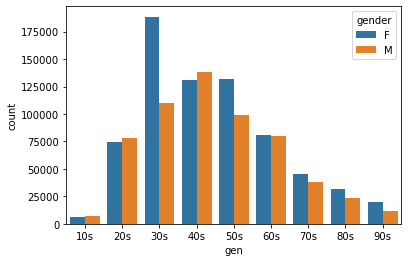

In [27]:
sns.countplot(x = 'gen', data = df, hue = 'gender', order = sorted(df.gen.unique()))

10대, 20대, 40대를 제외하고 남성이 더 많으며 특히 남성 30대의 비중이 압도적으로 높음을 확인해 볼 수 있다.   

#### job

카드 명의자의 직업에 대해서도 고민해 볼 수 있을 것이다.

In [28]:
len(df.job.unique())

494

In [29]:
job_fraud_ratio = df.loc[df.is_fraud == 1].job.value_counts() / df.job.value_counts()
job_fraud_ratio.sort_values(ascending = False)[:20]

Armed forces technical officer       1.000000
Engineer, site                       1.000000
Information officer                  1.000000
Legal secretary                      1.000000
Industrial buyer                     1.000000
Careers adviser                      1.000000
Homeopath                            1.000000
Broadcast journalist                 1.000000
Personnel officer                    1.000000
Forest/woodland manager              1.000000
Sales promotion account executive    1.000000
Air traffic controller               1.000000
Contracting civil engineer           1.000000
Ship broker                          1.000000
Solicitor                            1.000000
Accountant, chartered                1.000000
Dancer                               1.000000
Warehouse manager                    1.000000
Veterinary surgeon                   1.000000
Lawyer                               0.051852
Name: job, dtype: float64

이렇게 일부 직업의 경우가 1로 발생하는 것으로 보이는데 이는 정말로 전체가 그랬거나,  
이 직업을 가진 사람이 단 1명뿐일지도 모르는 것이다.

### (4) Time/Place EDA

결제 시간과 장소에 따라서도 차이를 줄 수 있을것이며, 주소지와의 위도/경도 차이 또한 판단 가능할 것이다.

#### 거래 시간
trans_date_trans_time 에는 연-월-일-시-분-초가 string 형식으로 지정되어 있다.  
우선 거래 일자별로 몇 건의 거래가 발생했는지, 며칠 정도의 데이터인지 확인하고자 한다.  

In [30]:
df.trans_date_trans_time

0          2019-01-01 00:00:18
1          2019-01-01 00:00:44
2          2019-01-01 00:00:51
3          2019-01-01 00:01:16
4          2019-01-01 00:03:06
                  ...         
1296670    2020-06-21 12:12:08
1296671    2020-06-21 12:12:19
1296672    2020-06-21 12:12:32
1296673    2020-06-21 12:13:36
1296674    2020-06-21 12:13:37
Name: trans_date_trans_time, Length: 1296675, dtype: object

2019/01/01~2020/06/21 12시 13분경의 데이터가 모여있음을 확인할 수 있다.
이를 이제 월간 결제 이력 단위로 끊을 수 있을 것이다.

In [31]:
df['trans_month'] = df.trans_date_trans_time.apply(lambda s : s[:7])

월별 결제 회수를 확인해보고자 한다.

<AxesSubplot:xlabel='trans_month', ylabel='count'>

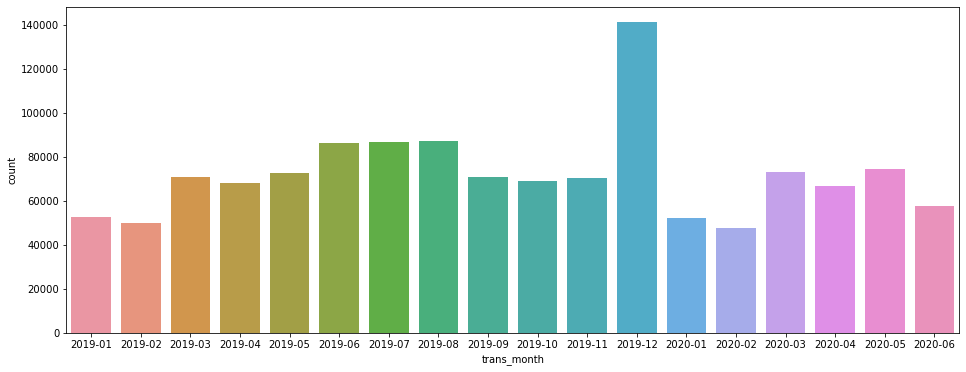

In [32]:
plt.figure(figsize = (16, 6))
sns.countplot(x = 'trans_month', data = df)

전체적으로 비슷한 결제 횟수롤 보이고 있으나, 2019-12월에 결제 횟수가 특히 많음을 확인했다.  
어느 월에 가장 fraud가 많이 발생했는지 또한 확인해보가자 한다.

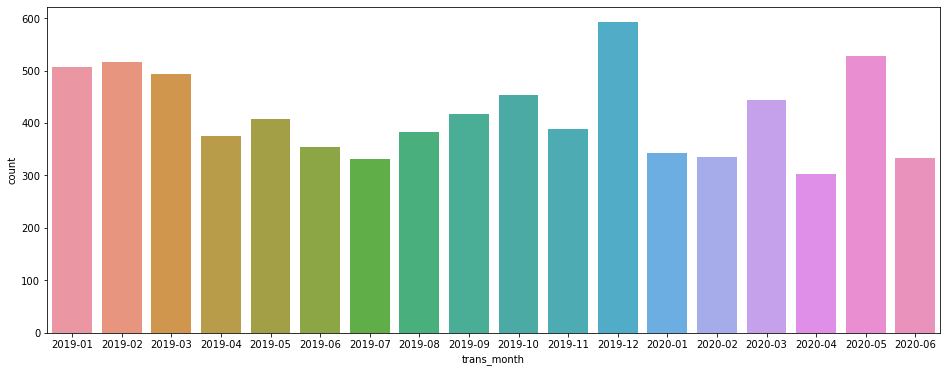

In [33]:
plt.figure(figsize = (16, 6))
sns.countplot(x = 'trans_month', data = df.loc[df.is_fraud == 1])
plt.show()

fraud 건수 역시 2019-12가 가장 많으며 2020-05, 2019-01~2019-02 사이가 그 뒤를 잇고 있음을 볼 수 있다.  
여기서 단순히 건 수에 따른이 아닌 fraud 발생 비율로 확인해보면 다음과 같다.  

In [34]:
fraud_cnt_month = (df.loc[df.is_fraud == 1]).trans_month.value_counts()
total_cnt_month = (df.trans_month.value_counts())

month = total_cnt_month.index
rate = []
for m in month:
    fraud_rate = fraud_cnt_month[m] / total_cnt_month[m] * 100
    rate.append(fraud_rate)

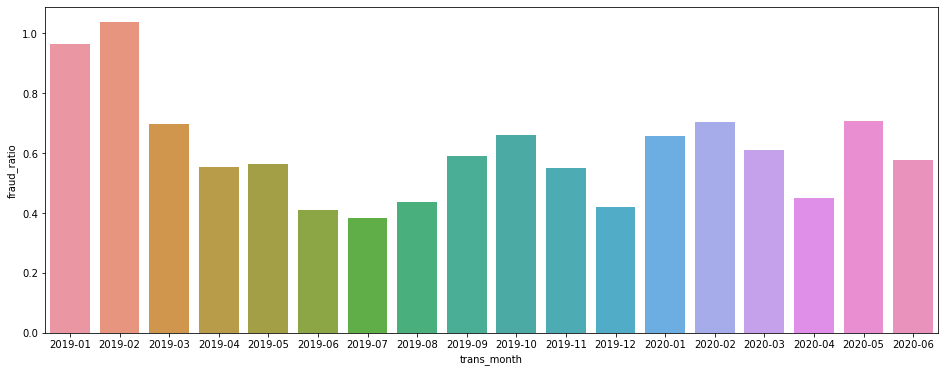

In [35]:
plt.figure(figsize = (16, 6))
sns.barplot(x = month, y = rate, order = sorted(month))
plt.xlabel('trans_month')
plt.ylabel('fraud_ratio')
plt.show()

해석 / 거래 자체는 2019-12에 가장 빈번하게 일어났으나  2019-01~2019-02 사이에 fraud_ratio 가 가장 높게 나타났다.

또한 거래 월 / fraud 여부에따라 거래 금액의 분포를 볼 수 있을 것이다. 값의 상한이 크므로 5000 이하로 확인한다.

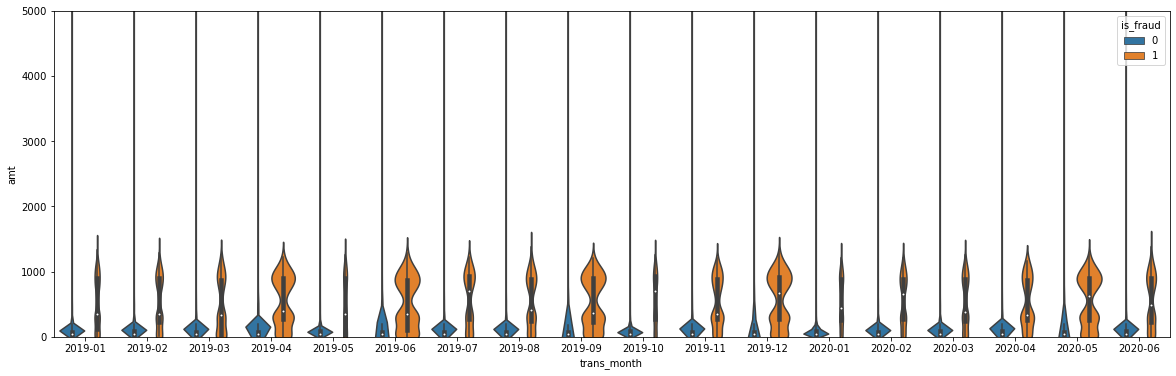

In [36]:
plt.figure(figsize = (20, 6))
sns.violinplot(x = 'trans_month', y = 'amt', hue = 'is_fraud', data = df)
plt.ylim(0, 5000)
plt.show()

업종과 다르게 월의 경우는 명백하게 fraud 케이스의 amt 하한 값을 month만 갖고 분류하기에는 어려움을 알 수 있다.

#### 거래 장소
거래 장소의 경우는 다음과 같은 두 가지 분석이 가능하다.
- 단순 위치만을 비교하여, 어느 위치에서 가장 fraud가 많이 발생했는지에 대한 분석  
- 카드 주인과 거래 위치를 거리를 재 거리가 멀면 fraud가 많이 발생했는지에 대한 분석  

먼저, 거래 위치의 위도와 경도의 분포를 확인해보고자 한다.

In [37]:
df[['merch_lat', 'merch_long']].describe()

,merch_lat,merch_long
count,1.296675e+06,1.296675e+06
mean,3.853734e+01,-9.022646e+01
std,5.109788e+00,1.377109e+01
min,1.902779e+01,-1.666712e+02
25%,3.473357e+01,-9.689728e+01
50%,3.936568e+01,-8.743839e+01
75%,4.195716e+01,-8.023680e+01
max,6.751027e+01,-6.695090e+01


<AxesSubplot:xlabel='merch_long', ylabel='Count'>

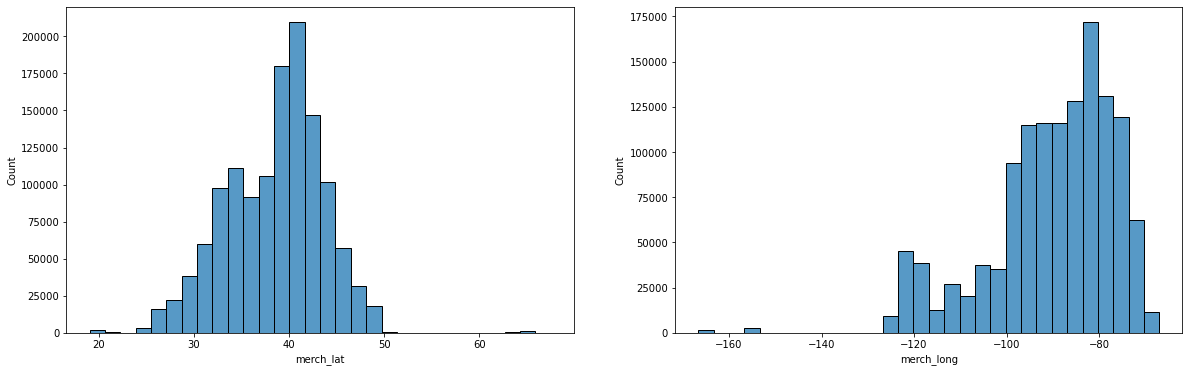

In [38]:
plt.figure(figsize = (20, 6))
plt.subplot(121)
sns.histplot(x = 'merch_lat', data = df, bins = 30)

plt.subplot(122)
sns.histplot(x = 'merch_long', data = df, bins = 30)

다음은 카드 명의자들의 거주지의 주소 분포 확인이다.

<AxesSubplot:xlabel='long', ylabel='Count'>

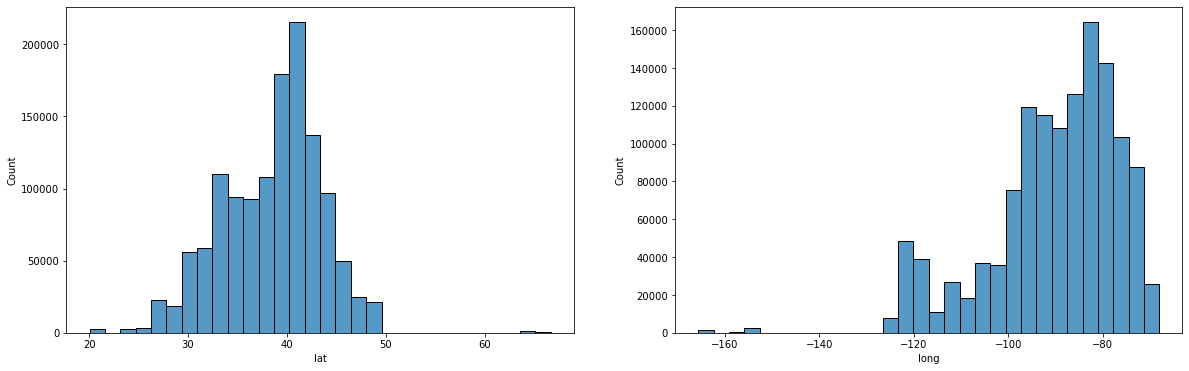

In [39]:
plt.figure(figsize = (20, 6))
plt.subplot(121)
sns.histplot(x = 'lat', data = df, bins = 30)

plt.subplot(122)
sns.histplot(x = 'long', data = df, bins = 30)

분포 자체는 거주지와 구매지 위치가 거의 유사하게 나왔음을 알 수 있다.  
또한 특정 위치에 몰려있음을 알 수 있다. 이에 따라 도시 정보를 활용하기 좋은지를 확인한다.  

In [40]:
len(df.city.unique())

894

900 개에 가까운 도시가 존재하여, 도시 정보를 있는 그대로 사용하기는 어려워보인다.  
주의 경우는 어떤지 확인한다.

In [41]:
len(df.state.unique())

51

51개주에 다 널리 분포되어 있다... 주별 인구 차이를 확인하고자 한다.

<AxesSubplot:xlabel='state', ylabel='count'>

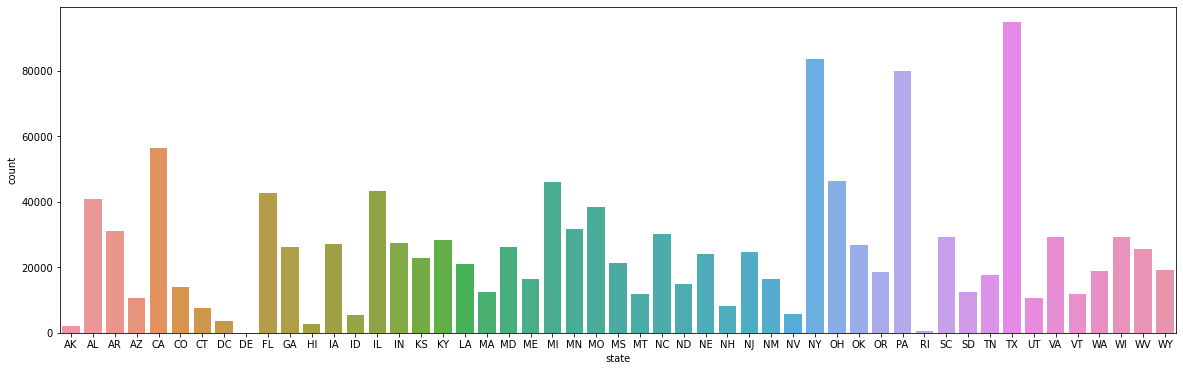

In [42]:
plt.figure(figsize = (20, 6))
sns.countplot(x='state', data = df, order = sorted(df.state.unique()))

TX, NY, PA, CA 등의 주에 많은 카드 사용자가 분포하고 있음을 알 수 있다.
fraud 발생 건수도 비슷한 분포를 보이는지 확인해보고자 한다.

<AxesSubplot:xlabel='state', ylabel='count'>

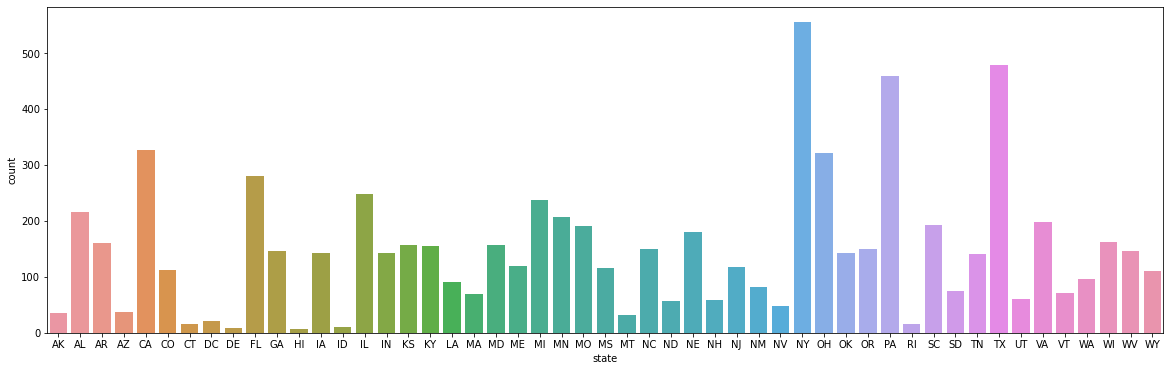

In [43]:
plt.figure(figsize = (20, 6))
sns.countplot(x='state', data = df.loc[df.is_fraud == 1], order = sorted(df.state.unique()))

state에 따라 fraud 발생 건에 대한 분포 역시 유사하게 나옴을 알 수 있다.

이제 명의자 주소와 상점 주소의 거리가 fraud에 얼마나 영향을 미칠지를 확인해보고자 한다.

In [44]:
# (lat, long)과 (merch_lat, merch_long)의 거리를 계산한다.
# 위도/경도에 대한 정보지만, 좌표의 역할을 할 수 있다고 가정 Euclidean Distance를 활용한다.
x = df.merch_lat - df.lat
y = df.merch_long - df.long

df['distance'] = np.sqrt(x ** 2 + y ** 2)

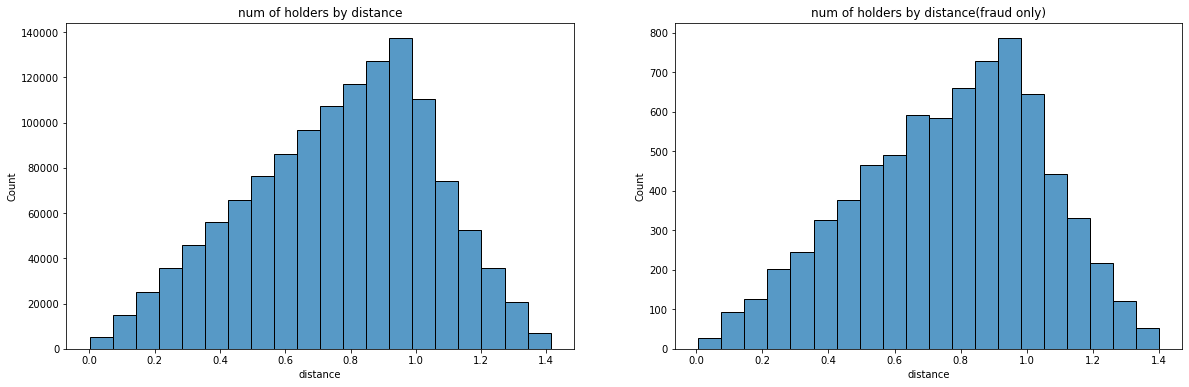

In [45]:
plt.figure(figsize = (20, 6))
plt.subplot(121)
sns.histplot(x = 'distance', data = df, bins = 20)
plt.title('num of holders by distance')

plt.subplot(122)
sns.histplot(x = 'distance', data = df.loc[df.is_fraud == 1], bins = 20)
plt.title('num of holders by distance(fraud only)')

plt.show()

분포를 고려하였을 때, 거래지와 집까지의 거리가 멀다고, fraud가 더 많이 발생하는 것은 아닌 것으로 보인다.

### (5) Total EDA

### (6) 종합 해석
EDA 결과를 통해 얻어내려고자 하는 바는, 사기가 어디에서 더 발생했을지 가능성이 높은 경우를 알아내고자 하는 것이다.

## 모델 설계 계획
다음과 같은 계획으로 모델을 세우고자 한다.  

(1) 가설 검정  
  - Fraud가 더 많이 발생하는 건에 대한 확인
    - 특정 업종에서 Fraud가 더 빈번히 발생할 것이다.
    - 특정 업종의 구매 금액대에서 Fraud가 더 빈번히 발생할 것이다.
    - 구매자와   
    
(2) 변수 생성
  - 위에서 확인한 내용과 EDA 결과를 바탕으로 변수를 생성한다.
    - 업종의 경우 Fraud가 빈번하게 발생하는 업종은 그대로, 잘 발생하지 않은 업종은 ETC로 묶는다.
    - 금액의 경우 특정 범위를 벗어나면 비정상, 아닐 경우 정상으로 처리한다. 이때 업종의 데이터 등을 활용한다.
    - 거리의 경우에도 특정 범위를 벗어나면 비정상, 아닐 경우 정상으로 처리한다.
    
Remark. 생각해 볼 법한 변수  
성연령별로 주로 구매하는 품목이 있을 것이다. 이것에 벗어나는 물건에 대해서도 처리해볼 법 하다.